# Ejercicio clase 3: SGD implementando PyTorch
Se resuelve el ejercicio 2 de la clase 2 empleando PyTorch. Se cuenta con un dataset sintético conformado a partir de la función,

$$ y = -(x-2)^2 + 3 + 0.2\sin(16x) $$

Y se pretende encontrar  un polinomio predictor de segundo grado, cuyos parámetros iniciales son elegidos al azar,

$$ \hat{y} = w_1x^2 + w_2x + w_3 $$

## Librerías necesarias

In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn

from matplotlib import pyplot as plt

torch.set_printoptions(edgeitems=2, linewidth=75)



## Construcción de dataset y funciones
A continuación se comienza con la resolución del problema. Se arma un dataset sintético con $n=100000$ muestras

In [2]:
n = 100000
X = torch.linspace(-3, 7, n).view(-1, 1)
y = -(X-2)**2 + 3 + 0.2*torch.sin(16*X).view(-1,1) 

Se muestra el gráfico de la función para visualizar que se busca predecir con el polinomio de segundo grado

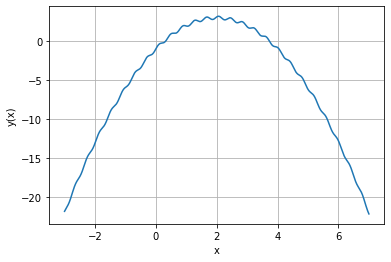

In [3]:
plt.plot(X,y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)

### Funciones


In [4]:
# Modelo
def model(X, w_1, w_2, w_3):
    '''
    X: dataset
    w_i: parámetros del polinomio predictor
    '''
    return w_1*X**2 + w_2*X + w_3

In [5]:
# Función de pérdida
def loss_fn(y_label, y_pred):
    squared_diffs = (y_label - y_pred)**2
    return squared_diffs.mean()

In [6]:
# Error cuadrático medio
def mse(y_label, y_pred,samples):
    return torch.sum((y_label - y_pred) ** 2) / samples

Función de entrenamiento

In [7]:
def training_loop(n_epochs,  imp, optimizer, W, X_train, y_label):
    '''
    n_epochs: cantidad de iteraciones de entrenamiento.
    imp: paso para la impresión de cada epoch durante entrenamiento.
    optimizer: optimiazor a emplear, previamente definido.
    W: tensor de parámetros iniciales con  requires_grad=True.
    X_train: set de datos de entrenamiento.
    y_label: objetivo a predecir.
    '''
       
    # Inicialización del acumulador de la función de pérdida
    L = []
    
    for epoch in range (1, n_epochs+1):
        y_pred = model(X, *W)
        loss = loss_fn(y_label, y_pred)
        L.append(loss)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch <= 3 or epoch % imp == 0:
            print('Epoch %d , Loss %f' % (epoch, float(loss)))
    
    return L, W

## Pruebas
Con _DataLoader_ se definen atributos sobre el dataset al momento del entrenamiento. Para este ejercicio se considerarán:
- Tamaño del batch a emplear. Se tomará de 24, igual al ejercicio 2 de la clase 2.
- Si se realiza o no una permutación de muestras en cada iteración (_epock_). 

In [8]:
X_train = DataLoader(X, batch_size=24, shuffle=True)


Se definen los atributos que restan declarar. En ese sentido, el _learning rate_ a emplear será el mismo al empleado en el ejercicio 2 de la clase 2.
Respecto a la cantidad de iteraciones, se tomará el mismo número que el empleado en el ejercicio mencionado, aunque ahora la capacidad de cálculo es mejor. Se hace a título de graficar y comparar. 

In [9]:
# Epochs
n_epochs = 500
# Sencuencia de impresión
imp = 30

# Learning rate
alpha = 0.001


# Tensor de parámetros iniciales aleatorios
torch.manual_seed(0)
n_params = 3 #cantidad de parámetros
W = torch.randn(3, requires_grad=True)
#W = torch.tensor([1.0, 0.0], requires_grad=True)
# Optimizador
optimizer = optim.SGD([W], lr=alpha)

# 
L,_ =training_loop(n_epochs, imp, optimizer, W, X_train, y)

Epoch 1 , Loss 1111.527954
Epoch 2 , Loss 144.867615
Epoch 3 , Loss 59.033386
Epoch 30 , Loss 39.346535
Epoch 60 , Loss 29.689308
Epoch 90 , Loss 22.443995
Epoch 120 , Loss 17.005581
Epoch 150 , Loss 12.920989
Epoch 180 , Loss 9.850902
Epoch 210 , Loss 7.541199
Epoch 240 , Loss 5.801549
Epoch 270 , Loss 4.489392
Epoch 300 , Loss 3.497942
Epoch 330 , Loss 2.747202
Epoch 360 , Loss 2.177227
Epoch 390 , Loss 1.743115
Epoch 420 , Loss 1.411191
Epoch 450 , Loss 1.156226
Epoch 480 , Loss 0.959296


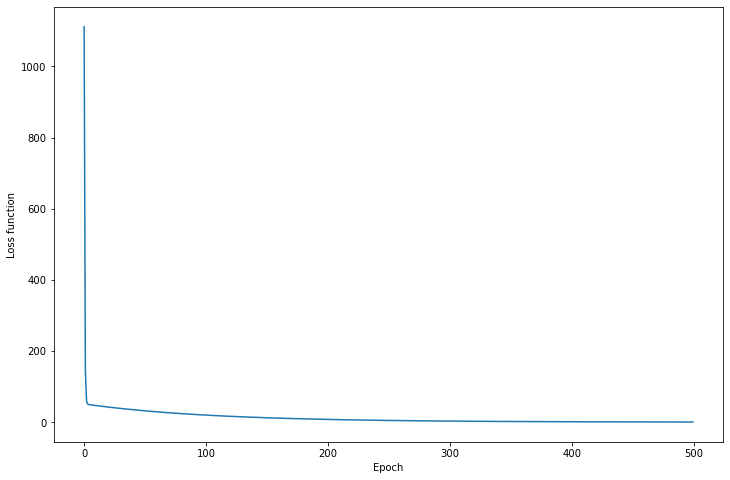

In [10]:
L_fig = [fl.item() for fl in L]

plt.figure(figsize=(12,8))
plt.plot(range(n_epochs), L_fig)
plt.ylabel('Loss function')
plt.xlabel('Epoch');

## Conclusión
Aunque inicialmente los parámetros derivan en un error muy grande, la convergencia es mucho más rápida que al aplicar el método SGD mini-bach sin PyTorch